In [97]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from itertools import product

df = pd.read_excel("Mg all data.xlsx")

X = df[['Time(min)', 'Scanspeed(mm/s)', 'Fluence (J/cm2)']]

#To select target variables
y_dls = df['DLS (nm)']
y_vis = df['UV VIS']
y_peak = df['UV peak(nm)']

#To train for target variables for surrogate model
dls = RandomForestRegressor(n_estimators=100, random_state=42)
dls.fit(X, y_dls)

vis = RandomForestRegressor(n_estimators=100, random_state=42)
vis.fit(X, y_vis)

peak = RandomForestRegressor(n_estimators=100, random_state=42)
peak.fit(X, y_peak)

# creating new values
time_new = np.linspace(df['Time(min)'].min(), df['Time(min)'].max(), 7)
scanspeed_new = np.linspace(df['Scanspeed(mm/s)'].min(), df['Scanspeed(mm/s)'].max(), 7)
fluence_new = np.linspace(df['Fluence (J/cm2)'].min(), df['Fluence (J/cm2)'].max(), 7)

#to create all combinations from input as per experiment
grid = list(product(time_new, scanspeed_new, fluence_new))
df_synthetic = pd.DataFrame(grid, columns=['Time(min)', 'Scanspeed(mm/s)', 'Fluence (J/cm2)'])

#to predict the outputs
df_synthetic['DLS (nm)'] = dls.predict(df_synthetic[['Time(min)', 'Scanspeed(mm/s)', 'Fluence (J/cm2)']])
df_synthetic['UV VIS'] = vis.predict(df_synthetic[['Time(min)', 'Scanspeed(mm/s)', 'Fluence (J/cm2)']])
df_synthetic['UV peak(nm)'] = peak.predict(df_synthetic[['Time(min)', 'Scanspeed(mm/s)', 'Fluence (J/cm2)']])

In [99]:
df_synthetic

,Time(min),Scanspeed(mm/s),Fluence (J/cm2),DLS (nm),UV VIS,UV peak(nm)
0,2.0,3000.0,1.830000,201.505945,0.556255,203.768750
1,2.0,3000.0,1.843333,201.505945,0.556255,203.768750
2,2.0,3000.0,1.856667,119.313010,0.415149,202.991488
3,2.0,3000.0,1.870000,119.313010,0.415149,202.991488
4,2.0,3000.0,1.883333,119.313010,0.412415,202.991488
...,...,...,...,...,...,...
338,25.0,3500.0,1.856667,109.977408,2.144186,204.965413
339,25.0,3500.0,1.870000,109.977408,2.144186,204.965413
340,25.0,3500.0,1.883333,110.023230,2.145598,204.965413
341,25.0,3500.0,1.896667,105.395149,2.251881,206.732667


In [101]:
df_synthetic.describe()

,Time(min),Scanspeed(mm/s),Fluence (J/cm2),DLS (nm),UV VIS,UV peak(nm)
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,13.500000,3250.000000,1.870000,129.529140,1.181795,203.799087
std,7.677867,166.910154,0.026706,25.508647,0.659983,1.203814
min,2.000000,3000.000000,1.830000,83.030464,0.371229,201.901113
25%,5.833333,3083.333333,1.843333,109.977408,0.649395,202.855583
50%,13.500000,3250.000000,1.870000,121.029174,0.740281,203.219244
75%,21.166667,3416.666667,1.896667,148.859583,1.818346,204.965413
max,25.000000,3500.000000,1.910000,201.505945,2.251881,206.732667


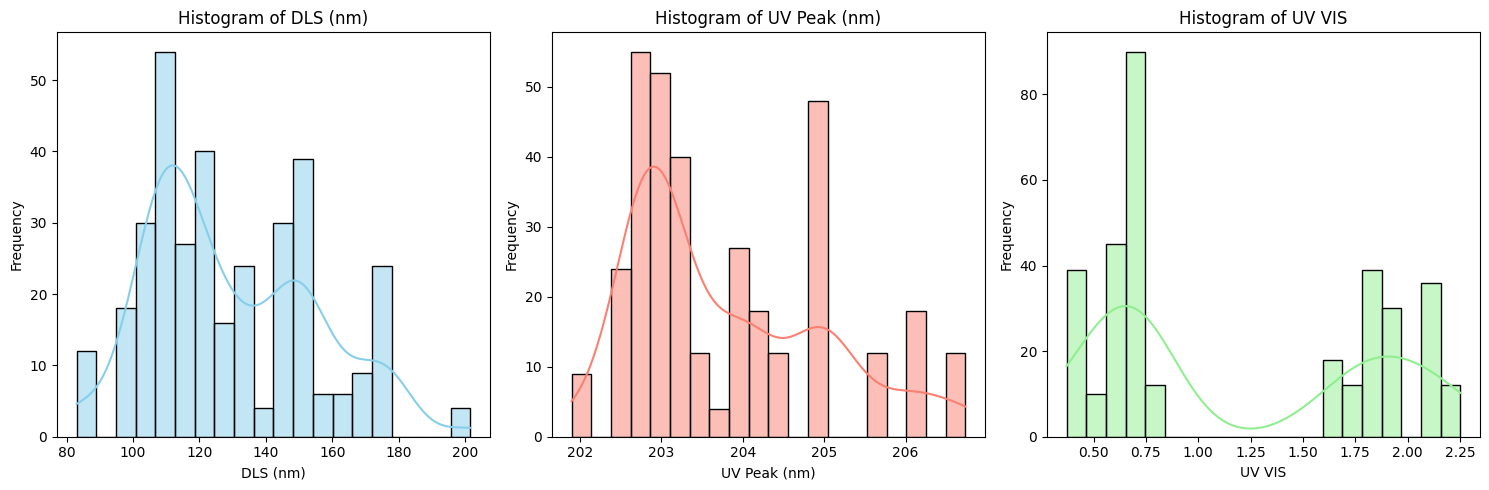

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Histogram for DLS (nm)
plt.subplot(1, 3, 1)
sns.histplot(df_synthetic['DLS (nm)'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of DLS (nm)')
plt.xlabel('DLS (nm)')
plt.ylabel('Frequency')

# Histogram for UV peak(nm)
plt.subplot(1, 3, 2)
sns.histplot(df_synthetic['UV peak(nm)'], bins=20, kde=True, color='salmon')
plt.title('Histogram of UV Peak (nm)')
plt.xlabel('UV Peak (nm)')
plt.ylabel('Frequency')

# Histogram for UV VIS
plt.subplot(1, 3, 3)
sns.histplot(df_synthetic['UV VIS'], bins=20, kde=True, color='lightgreen')
plt.title('Histogram of UV VIS')
plt.xlabel('UV VIS')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()